In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def discreteFurier(x, k):
    N = len(x)
    x_k = 0
    for n in range(0,N):
        x_k += x[n]*np.exp(-2 * np.pi * 1j / N * k * n)
    return x_k

def discreteFurierInverse(x, n):
    N = len(x)
    x_n = 0
    for k in range(0,N):
        x_n += x[k]*np.exp(2 * np.pi * 1j / N * k * n)
    return x_n/N

In [59]:
def draw(x, t):
    myDFT = ([discreteFurier(x, i) for i in range(len(x))])
    
    myIDFT = ([discreteFurierInverse(x, i) for i in range(len(x))])
        
    myDFT_IDFT  =([discreteFurierInverse(myDFT, i) for i in range(len(x))])

    plt.figure(figsize=(14,11))
    
    frequenKotel = 1/(t[1]-t[0])/2
    xRight = np.arange(0,frequenKotel,2*frequenKotel/len(t))
    
    plt.subplot(321)
    plt.title("function")
    plt.plot(t, x, 'rd')
    
    plt.subplot(322)
    plt.title("IDFT(DFT)")
    plt.plot(t, np.real(myDFT_IDFT), 'rd')
    
    plt.subplot(312)
    plt.title("dft")
    plt.plot(xRight, np.abs(myDFT)[:int(len(t)/2)], 'rd')
    plt.plot(xRight, np.abs(np.fft.fft(x))[:int(len(t)/2)])

    
    plt.subplot(313)
    plt.title("mydft-dft")
    plt.plot(t, np.abs(myDFT-np.fft.fft(x)))
    

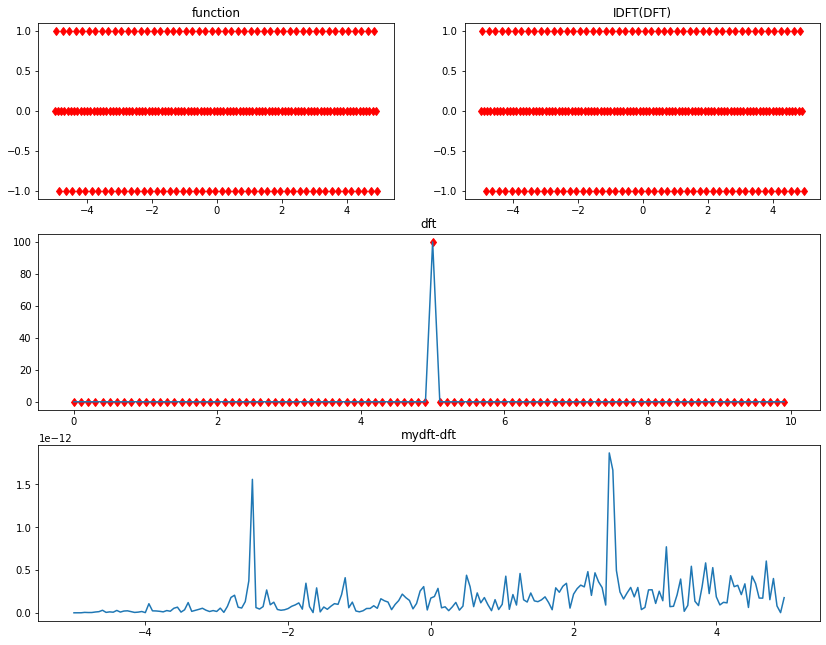

In [63]:
#гармоническая
t = np.arange(-5, 5, 0.05)
draw(np.sin(5*t*(2*np.pi)), t)

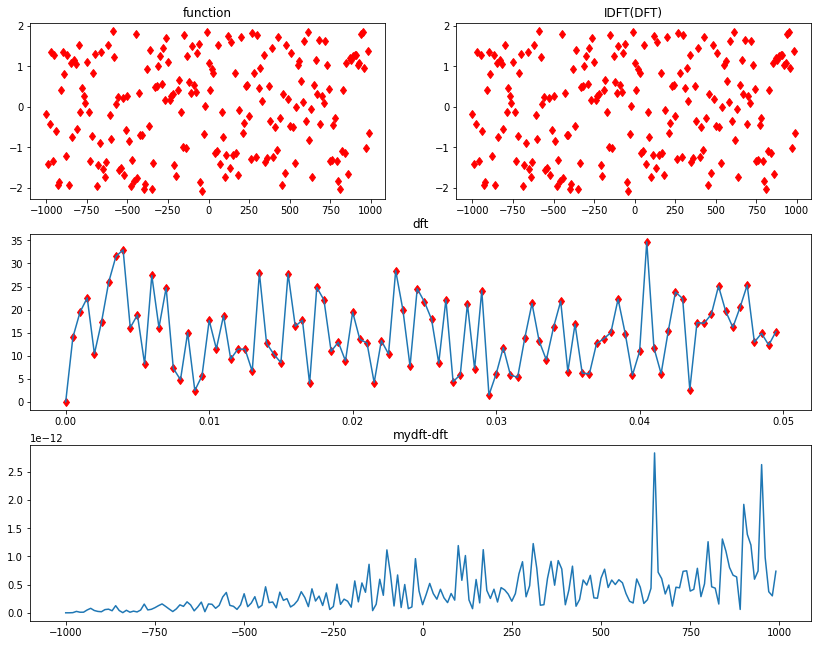

In [53]:
#шум
t = np.arange(-1000, 1000, 10)
noize = ([np.random.uniform(5) for i in range(len(t))])
noize -= np.mean(noize)
draw(noize, t)

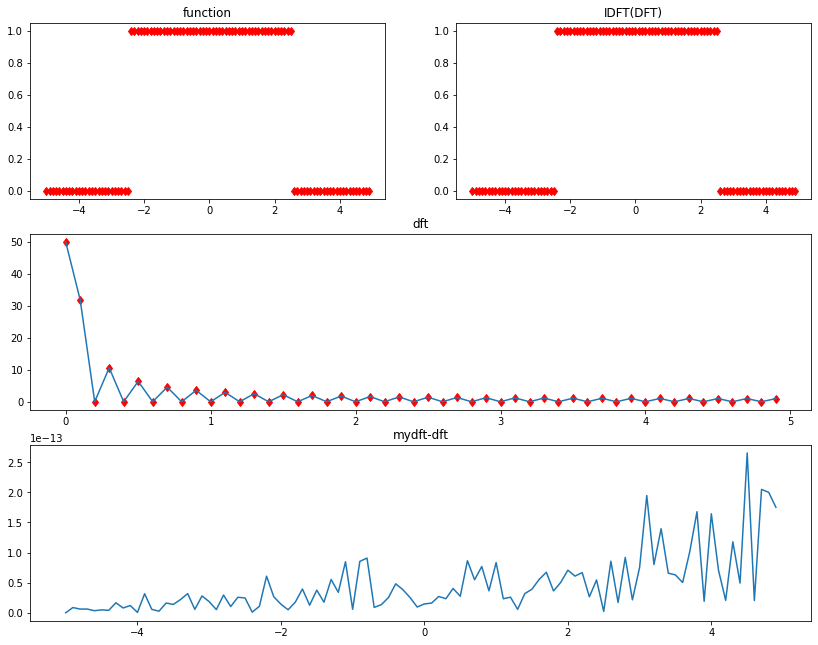

In [54]:
# рект
def rect(t):
    result = np.zeros(len(t))
    for i in range(0, len(t)):
        result[i] = t[i] >= -np.abs(t[0])/2 and t[i] <= np.abs(t[0])/2
    return result

t = np.arange(-5, 5, 0.1)
draw(rect(t), t)

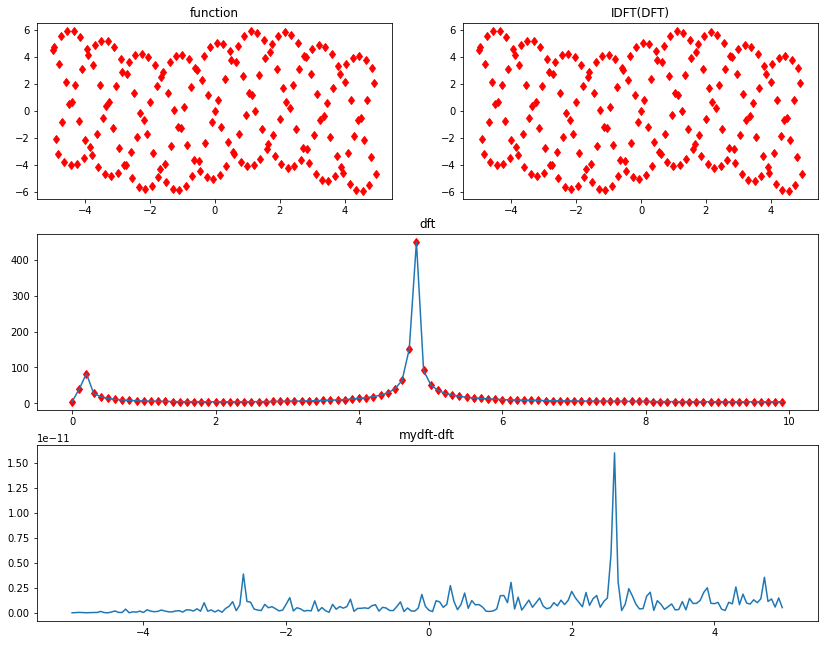

In [55]:
# сумма двух гармоническая
t = np.arange(-5, 5, 0.05)
draw(np.sin(t)+5*np.sin(30*t), t)